In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import profile_report

from sklearn.preprocessing import LabelEncoder


In [4]:
data = pd.read_csv('../pro-test/data/iraq_1_drop_non_impact_params.csv', index_col=0)
data.head(5)

,nameofevent,startdate,endate,ongoing,governorate,district,location,gpslatend,gpslongend,locationtypeend,...,beltegeyyarepress,militiarepress,partyrepress,employerrepress,ISISrepress,otherrepress,killed,injured,arrested,response
recordnumber,,,,,,,,,,,,,,,,,,,,,
201909011,NaN,2019-06-24,2019-09-24,1.0,Baghdad,NaN,وزارة النفط,33.340440,44.433313,Government building,...,0,0,0,0,0,0,0.0,0.0,0.0,Negotiations ongoing
201909010,NaN,2019-08-19,2019-09-25,1.0,Baghdad,NaN,مكتب رئيس الوزراء,33.311670,44.391305,Government building,...,0,0,0,0,0,0,0.0,0.0,0.0,Authorities not responding or ignoring
201909020,NaN,2019-09-02,NaN,0.0,Erbil,NaN,مجلس الوزراء,36.193625,43.995335,Government building,...,0,0,0,0,0,0,0.0,0.0,0.0,Authorities not responding or ignoring
201909017,NaN,2019-09-02,NaN,0.0,Basrah,NaN,مطار البصرة,30.553304,47.668227,Infrastructure,...,0,0,0,0,0,0,0.0,0.0,0.0,Authorities not responding or ignoring
201909019,NaN,2019-09-02,NaN,0.0,Missan,NaN,شركة نفط ميسان,31.820092,47.162640,Company offices,...,0,0,0,0,0,0,0.0,0.0,6.0,Authorities not responding or ignoring


In [5]:
data.dropna(subset=['repression'], inplace=True)

In [6]:
data.shape

(2639, 77)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639 entries, 201909011 to 201912487
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nameofevent        87 non-null     object 
 1   startdate          2639 non-null   object 
 2   endate             174 non-null    object 
 3   ongoing            2637 non-null   float64
 4   governorate        2638 non-null   object 
 5   district           938 non-null    object 
 6   location           2635 non-null   object 
 7   gpslatend          1632 non-null   float64
 8   gpslongend         1632 non-null   float64
 9   locationtypeend    2635 non-null   object 
 10  gpslatstart        82 non-null     float64
 11  gpslongstart       82 non-null     float64
 12  locationtypestart  103 non-null    object 
 13  sizeexact          18 non-null     float64
 14  sizeestimate       2621 non-null   float64
 15  demandtypeone      2638 non-null   object 
 16  demandtypet

In [8]:
# data.profile_report()

In [9]:
corr = data.corr()
corr[corr == 1] = 0
unstacked = corr.unstack().reset_index()
unstacked.columns = ['feature_1','feature_2', 'correlation']
unstacked.sort_values(by="correlation",ascending=False, inplace=True)
corr_df = unstacked[unstacked['feature_1'] != unstacked['feature_2']]
corr_df[corr_df['correlation']>0.4]

,feature_1,feature_2,correlation
54,gpslatend,gpslatstart,0.996375
154,gpslatstart,gpslatend,0.996375
1688,rubberbullets,sizeexact,0.996145
288,sizeexact,rubberbullets,0.996145
303,sizeexact,killed,0.582589
2453,killed,sizeexact,0.582589
2072,policerepress,teargas,0.573074
1672,teargas,policerepress,0.573074
1817,liveammo,teargas,0.570820
1667,teargas,liveammo,0.570820


In [10]:
data_2 = data.copy()

In [11]:
le = LabelEncoder()
data_2['repression'] = le.fit_transform(data_2['repression'])

In [12]:
data2.columns

NameError: name 'data2' is not defined

In [13]:
data2.drop(columns=['gpslatend', 'gpslongend','gpslatstart','gpslongstart',
                   'teargas','rubberbullets',
                   'shootinginair', 'liveammo', 'sticks', 'surround', 'dogs', 'cleararea',
                   'policerepress', 'milrepress', 'beltegeyyarepress', 'militiarepress',
                   'partyrepress', 'employerrepress', 'ISISrepress', 'otherrepress',
                   'killed', 'injured', 'arrested', 'response'], inplace=True)

NameError: name 'data2' is not defined

In [ ]:
data2.columns

In [14]:
%matplotlib inline
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=1)
heatmap = sns.heatmap(data=data2.corr(), cmap = "coolwarm", annot = False)
plt.show()

NameError: name 'data2' is not defined

In [15]:
non_object_types = data.select_dtypes(exclude=['object'])
non_object_types

,ongoing,gpslatend,gpslongend,gpslatstart,gpslongstart,sizeexact,sizeestimate,govresign,antiUS,antiIran,...,milrepress,beltegeyyarepress,militiarepress,partyrepress,employerrepress,ISISrepress,otherrepress,killed,injured,arrested
recordnumber,,,,,,,,,,,,,,,,,,,,,
201909011,1.0,33.340440,44.433313,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
201909010,1.0,33.311670,44.391305,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
201909020,0.0,36.193625,43.995335,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
201909017,0.0,30.553304,47.668227,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
201909019,0.0,31.820092,47.162640,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202002476,0.0,NaN,NaN,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
202002472,0.0,NaN,NaN,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
202002477,0.0,NaN,NaN,NaN,NaN,NaN,-99.0,0,0,0,...,0,0,0,0,0,0,0,0.0,3.0,0.0


In [16]:
temp = pd.get_dummies(data['repression'])
temp

,Arrests / detentions,Deaths inflicted,Injuries inflicted,"No known coercion, no security presence",Physical harassment,Security forces or other repressive groups present at event
recordnumber,,,,,,
201909011,0,0,0,1,0,0
201909010,0,0,0,0,1,0
201909020,0,0,0,1,0,0
201909017,0,0,0,1,0,0
201909019,1,0,0,0,0,0
...,...,...,...,...,...,...
202002476,0,0,0,1,0,0
202002472,0,0,0,1,0,0
202002477,0,0,1,0,0,0


In [17]:
combined = pd.concat([non_object_types,temp], axis=1)

In [18]:
combined.columns

Index(['ongoing', 'gpslatend', 'gpslongend', 'gpslatstart', 'gpslongstart',
       'sizeexact', 'sizeestimate', 'govresign', 'antiUS', 'antiIran',
       'antiSoleimani', 'proUS', 'proIran', 'proSoleimani', 'youth/students',
       'laborers/workers', 'unions/syndicates', 'peasants/farmers',
       'party members', 'activists/movts', 'gov workers', 'business',
       'residents', 'islamists', 'kurds', 'christians', 'tribes', 'soldiers',
       'police', 'NGOs/CSOs', 'womensgroups', 'refugees', 'teargas',
       'rubberbullets', 'shootinginair', 'liveammo', 'sticks', 'surround',
       'dogs', 'cleararea', 'policerepress', 'milrepress', 'beltegeyyarepress',
       'militiarepress', 'partyrepress', 'employerrepress', 'ISISrepress',
       'otherrepress', 'killed', 'injured', 'arrested', 'Arrests / detentions',
       'Deaths inflicted', 'Injuries inflicted',
       'No known coercion, no security presence', 'Physical harassment',
       'Security forces or other repressive groups present

In [19]:
target_columns = temp.columns
target_columns

Index(['Arrests / detentions', 'Deaths inflicted', 'Injuries inflicted',
       'No known coercion, no security presence', 'Physical harassment',
       'Security forces or other repressive groups present at event'],
      dtype='object')

In [20]:
highly_correlated_parameters = []

correlation_threshold = 0.15

df_correlations = abs(combined.corr())

for i in target_columns:
    highly_correlated_parameters.append(df_correlations[i][(df_correlations[i].values >= correlation_threshold) & (df_correlations[i] < 1)])
    print(f"{abs(round(combined.corr(),2)[i]).sort_values(ascending=False).head(20)}\n-------------------------------")

Arrests / detentions                                           1.00
gpslatstart                                                    0.29
No known coercion, no security presence                        0.25
policerepress                                                  0.25
cleararea                                                      0.23
gpslongstart                                                   0.18
arrested                                                       0.15
sticks                                                         0.11
gpslongend                                                     0.06
otherrepress                                                   0.05
govresign                                                      0.05
surround                                                       0.03
Deaths inflicted                                               0.03
youth/students                                                 0.03
gov workers                                     

In [21]:
highly_correlated_parameters

[gpslatstart                                0.285652
 gpslongstart                               0.182611
 cleararea                                  0.226378
 policerepress                              0.249975
 No known coercion, no security presence    0.247698
 Name: Arrests / detentions, dtype: float64,
 sizeexact                                  0.443063
 teargas                                    0.435458
 rubberbullets                              0.263640
 shootinginair                              0.161149
 liveammo                                   0.619139
 sticks                                     0.178010
 cleararea                                  0.274289
 policerepress                              0.446076
 milrepress                                 0.228495
 beltegeyyarepress                          0.183578
 militiarepress                             0.292352
 killed                                     0.598890
 injured                                    0.467142
 

In [22]:
highly_correlated_parameters_list = []
for i in highly_correlated_parameters:
    for j in i.index.tolist():
        highly_correlated_parameters_list.append(j)


In [23]:
highly_correlated_parameters_list

['gpslatstart',
 'gpslongstart',
 'cleararea',
 'policerepress',
 'No known coercion, no security presence',
 'sizeexact',
 'teargas',
 'rubberbullets',
 'shootinginair',
 'liveammo',
 'sticks',
 'cleararea',
 'policerepress',
 'milrepress',
 'beltegeyyarepress',
 'militiarepress',
 'killed',
 'injured',
 'arrested',
 'No known coercion, no security presence',
 'teargas',
 'liveammo',
 'sticks',
 'cleararea',
 'policerepress',
 'No known coercion, no security presence',
 'sizeexact',
 'teargas',
 'rubberbullets',
 'shootinginair',
 'liveammo',
 'sticks',
 'surround',
 'cleararea',
 'policerepress',
 'milrepress',
 'beltegeyyarepress',
 'militiarepress',
 'partyrepress',
 'killed',
 'injured',
 'Arrests / detentions',
 'Deaths inflicted',
 'Injuries inflicted',
 'Physical harassment',
 'Security forces or other repressive groups present at event',
 'teargas',
 'shootinginair',
 'liveammo',
 'sticks',
 'cleararea',
 'policerepress',
 'beltegeyyarepress',
 'No known coercion, no security 

In [54]:
orgnizer = data.groupby('orgtypefirst')
orgnizer

<AxesSubplot:xlabel='orgtypefirst,repression'>

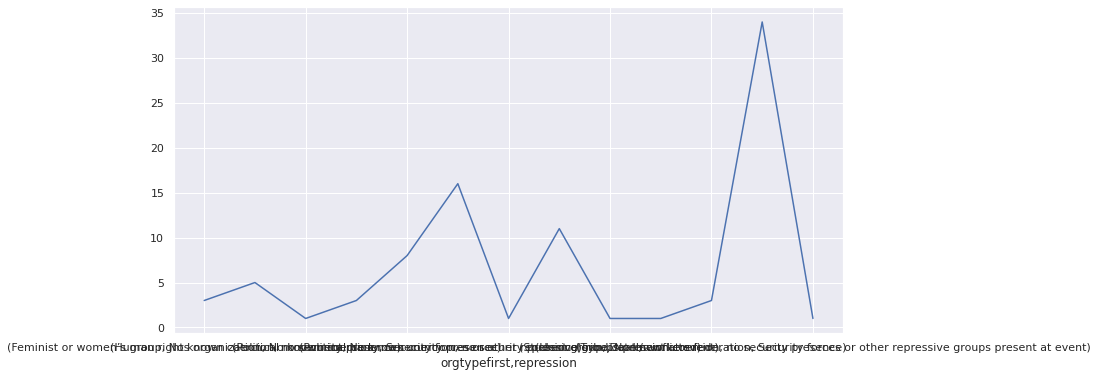

In [53]:
data.groupby('orgtypefirst')['repression'].value_counts().plot()

In [167]:
small_df = data[['orgtypefirst','repression']].reset_index().drop(columns='recordnumber')
small_df.fillna('no orga', inplace=True)

In [168]:
small_df

,orgtypefirst,repression
0,no orga,"No known coercion, no security presence"
1,no orga,Physical harassment
2,no orga,"No known coercion, no security presence"
3,no orga,"No known coercion, no security presence"
4,no orga,Arrests / detentions
...,...,...
2634,no orga,"No known coercion, no security presence"
2635,no orga,"No known coercion, no security presence"
2636,no orga,Injuries inflicted
2637,no orga,"No known coercion, no security presence"


# Plotting categorical columns against repression

In [206]:
grouped = pd.DataFrame(small_df.groupby('orgtypefirst')['repression'].value_counts().unstack())
grouped.iloc[:, [3,5,4,0,2,1]]
no_orga_df = grouped.drop(index='no orga')

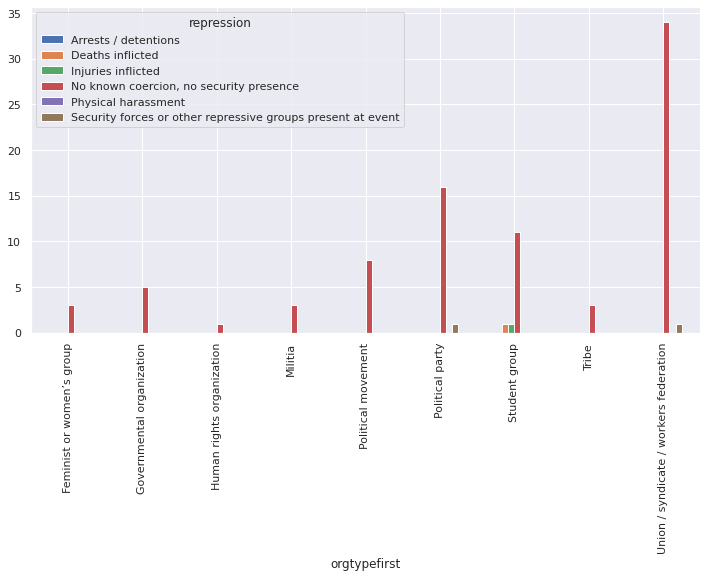

In [207]:
no_orga_df.plot(kind='bar')
plt.savefig('orga_repress.png')

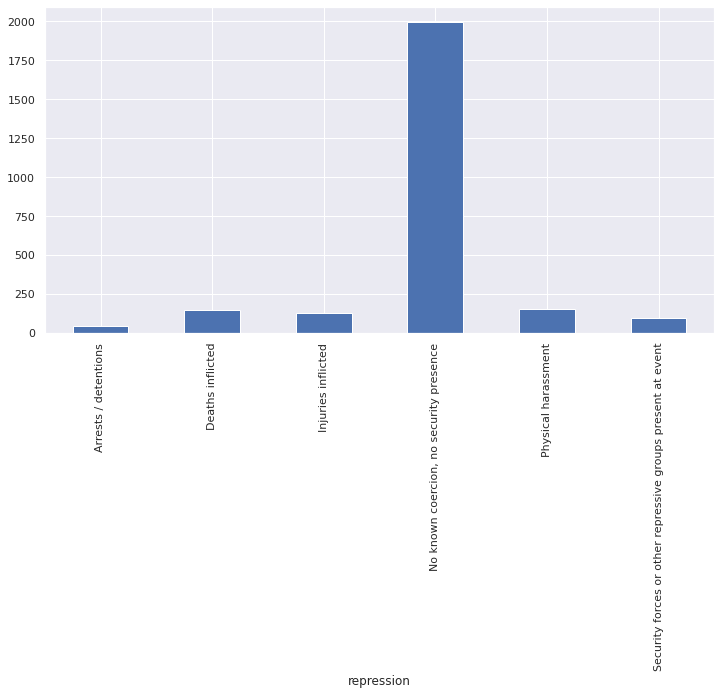

In [209]:
orga_df = grouped.iloc[-1]
orga_df.plot(kind='bar')
plt.savefig('no_orga_repress.png')

In [210]:
def future_plot(column, drop_non_violence=False):
    ''' create a dataframe of 2 columns only'''
    df = data[[column,'repression']].reset_index().drop(columns='recordnumber')
    
    '''groupby the column'''
    grouped_df = pd.DataFrame(df.groupby(column)['repression'].value_counts().unstack())
    grouped_df = grouped_df.iloc[:, [3,5,4,0,2,1]]
    if drop_non_violence == True:
        non_violence = grouped_df.drop(columns='No known coercion, no security presence')
        return non_violence.plot(kind='bar');
    else:
        return grouped_df.plot(kind='bar');

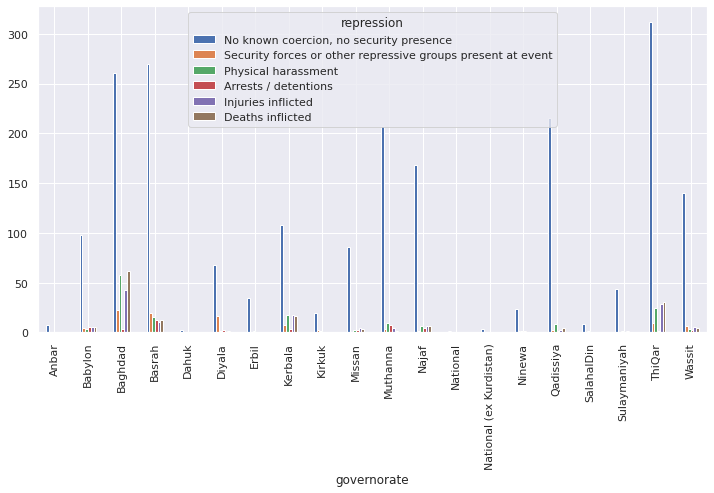

In [211]:
future_plot('governorate')
plt.savefig('gov_repress.png')

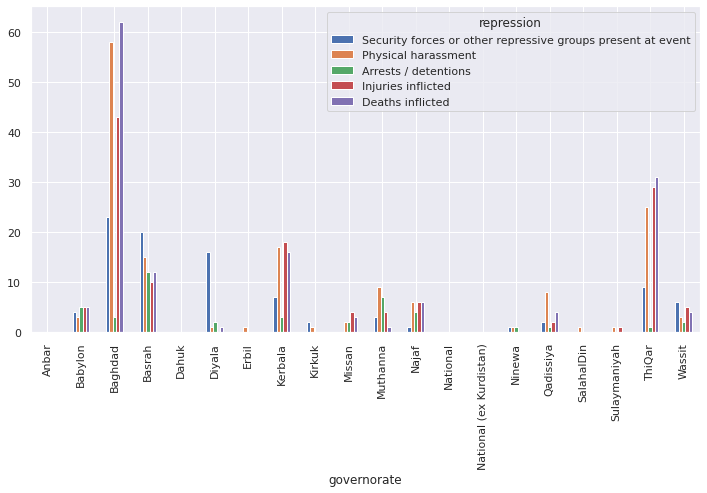

In [213]:
future_plot('governorate', drop_non_violence=True)
plt.savefig('gov2_repress.png')

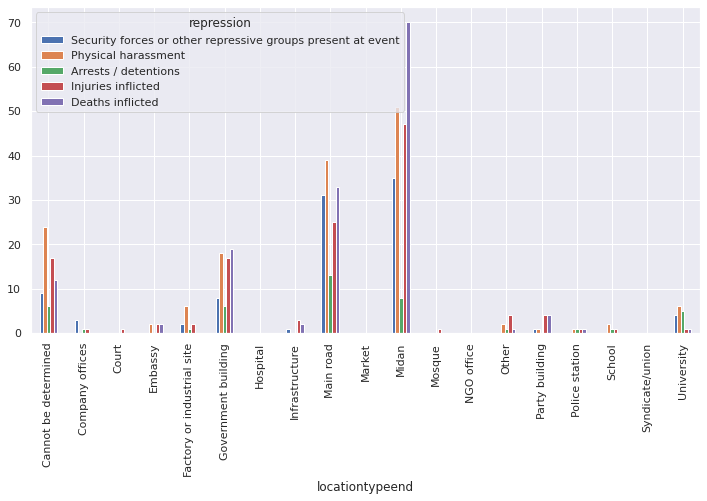

In [214]:
future_plot('locationtypeend', drop_non_violence=True)
plt.savefig('loc_type_repress.png')

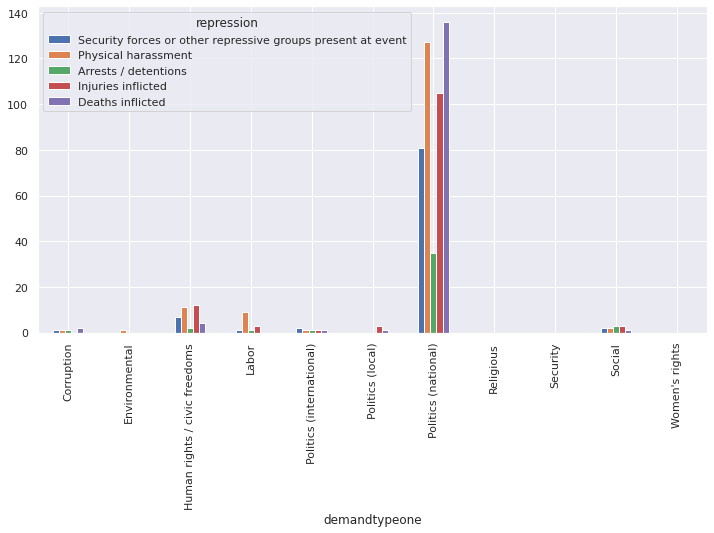

In [215]:
future_plot('demandtypeone', drop_non_violence=True)
plt.savefig('demand_repress.png')

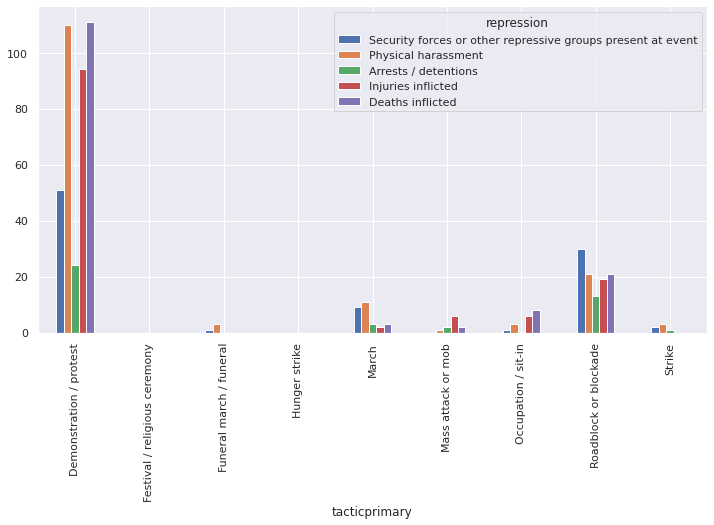

In [217]:
future_plot('tacticprimary', drop_non_violence=True)
plt.savefig('tactic_repress.png')

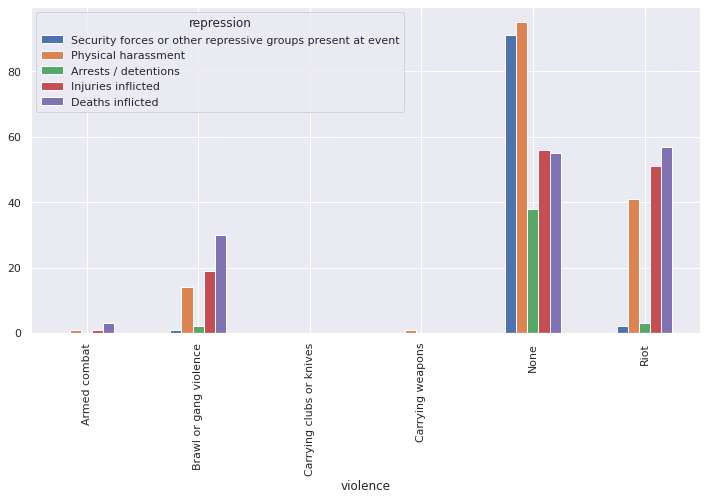

In [219]:
future_plot('violence', drop_non_violence=True)
plt.savefig('violence_repress.png')